# Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
hData = pd.read_csv("C:\\Users\\aloky\\OneDrive\\Desktop\\Sentiment Analysis\\god knows\\Processed\\lounges_processed.csv")

In [3]:
hData.head()

Unnamed: 0                                             Tweets Sentiment
0           0  frustrated upset mastercard elite cards restri...  Negetive
1           1  bangalore airport lounge credit card access go...  Positive
2           2  blrairport 080 lounge bangalore airport fantas...  Positive
3           3  thanks modiji goi digiyatra took 15 min bangal...  Positive
4           4  used bangalore airport excellent experience to...  Positive

In [4]:
hData = hData.drop(hData.columns[hData.columns.str.contains('Unnamed', case=False)], axis=1)

In [5]:
hData.head()

Tweets Sentiment
0  frustrated upset mastercard elite cards restri...  Negetive
1  bangalore airport lounge credit card access go...  Positive
2  blrairport 080 lounge bangalore airport fantas...  Positive
3  thanks modiji goi digiyatra took 15 min bangal...  Positive
4  used bangalore airport excellent experience to...  Positive

In [6]:
hData.Sentiment.value_counts()

Sentiment
Positive    43
Neutral      7
Negetive     5
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Sentiments')

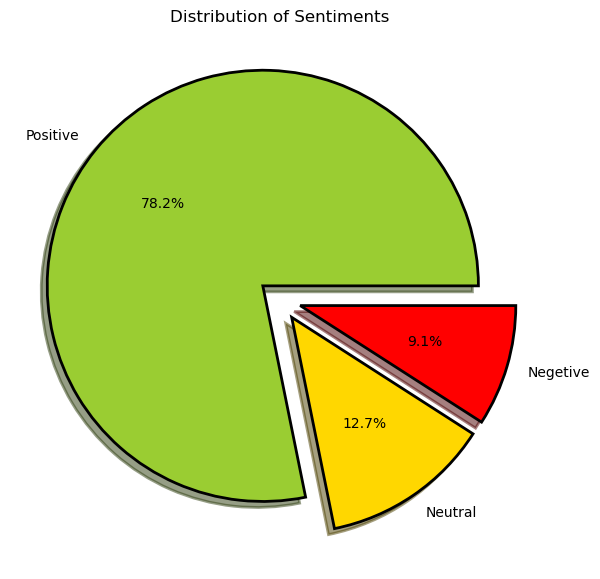

In [7]:
# Pie-Chart
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp={'linewidth':2, 'edgecolor':"black"}
tags = hData['Sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', shadow=True, colors=colors, autopct='%1.1f%%', wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of Sentiments")

## Analysis on the Negetive Tweets

In [8]:
# Collecting all the Negetive Tweets from the dataset
negetive_tweets = hData[hData.Sentiment == 'Negetive']

negetive_reviwes = negetive_tweets['Tweets'].tolist()

In [9]:
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable","already", "amp", "guys", "pls", 'im', "us", "another",
                     "next", "god", "hope", "bless", "value", "dearest", "get" , "im", "mins", "till", "still", "already"]

In [10]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
new_stop_words = [frozenset(stop_words)]
stop_words = new_stop_words + custom_stop_words

In [11]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = new_stop_words)
x = vectorizer.fit_transform(negetive_reviwes)

In [15]:
# Lda model
num_topics = 3
lda = LatentDirichletAllocation(n_components = num_topics, random_state=40)
lda.fit(x)

LatentDirichletAllocation(n_components=3, random_state=40)

In [16]:
num_top_words = 8
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [17]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: domestic,airport,airports,access,card
Topic 2: airports,access,domestic,airport,card
Topic 3: card,airport,access,airports,domestic


# Observation for negative tweets:
## 1) Restricted Lounge Access:
#### •	The frustration and disappointment of the cardholders are expressed due to the restricted access to the Bangalore airport's lounge, which is considered one of the best in the country.
#### •	There are complaints about the inefficiency of the credit card. Despite passengers having the card, the lounge access was declined at Bangalore Airport leading to dissatisfaction.
## 2) Declining Lounge Standards:
#### •	There are concerns about the cleaniness and hygine of the lounges.


## Analysis on the Positive Tweets

In [18]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
custom_stop_words = ["experience", "nice", "facilities", "staff", "domestic", "terminal", "international", 
                     "visit", "time", "comfortable", "much", "waiting", "time", "need", "also", "first", "since",
                     "always", "please", "last", "even", "near", "entire", "lot", "many", "used", "one", "entire", "though",
                     "amp", "us", "guys", "lol", "ps", "knows", "long", "inside", "many", "got" , "mr", "new" ,"would" ,"felt",
                     "doesn't", "took", "t2", "080"]
stop_words = stop_words + custom_stop_words
new_stop_words = [frozenset(stop_words)]

In [19]:
# Collecting all the Positive Tweets from the dataset
positive_tweets = hData[hData.Sentiment == 'Positive']
positive_reviews = positive_tweets['Tweets'].tolist()

In [20]:
# Weightage of the words in the tweets
vectorizer = CountVectorizer(max_df = 0.95, min_df = 2, stop_words = stop_words)
x = vectorizer.fit_transform(positive_reviews)

In [21]:
# Lda model
num_topics = 15
lda = LatentDirichletAllocation(n_components = num_topics, random_state=1)
lda.fit(x)

LatentDirichletAllocation(n_components=15, random_state=1)

In [22]:
num_top_words = 12
feature_names = vectorizer.get_feature_names_out()
topics=[]

In [23]:
# Extracting the topics from LDA model
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topics.append(top_words)

for i, topic in enumerate(topics):
    print(f"Topic {i+1}: {',' .join(topic)}")

Topic 1: food,blrairport,love,thanks,best,see,good,really,lounges,security,premium,hour
Topic 2: thanks,lounges,premium,food,blrairport,love,best,see,good,really,security,hour
Topic 3: access,card,credit,like,good,food,blrairport,love,thanks,best,see,really
Topic 4: great,amex,priority,best,doesnt,available,t1,visited,food,blrairport,love,thanks
Topic 5: good,blrairport,service,blrdomesticlounge,better,wiphan,say,see,hospitality,food,love,thanks
Topic 6: best,breakfast,world,live,food,blrairport,love,thanks,see,good,really,lounges
Topic 7: food,blrairport,card,flight,simply,recently,amazing,well,thank,say,indian,visited
Topic 8: food,blrairport,love,thanks,best,see,good,really,lounges,security,premium,hour
Topic 9: great,blrairport,amazing,food,excellent,thanks,team,india,flight,thank,wiphan,t1
Topic 10: food,class,section,good,blrairport,almost,hour,spent,team,indian,better,well
Topic 11: food,hospitality,place,work,relax,staffs,healthy,non,cosy,spicy,good,hour
Topic 12: food,blrairpo

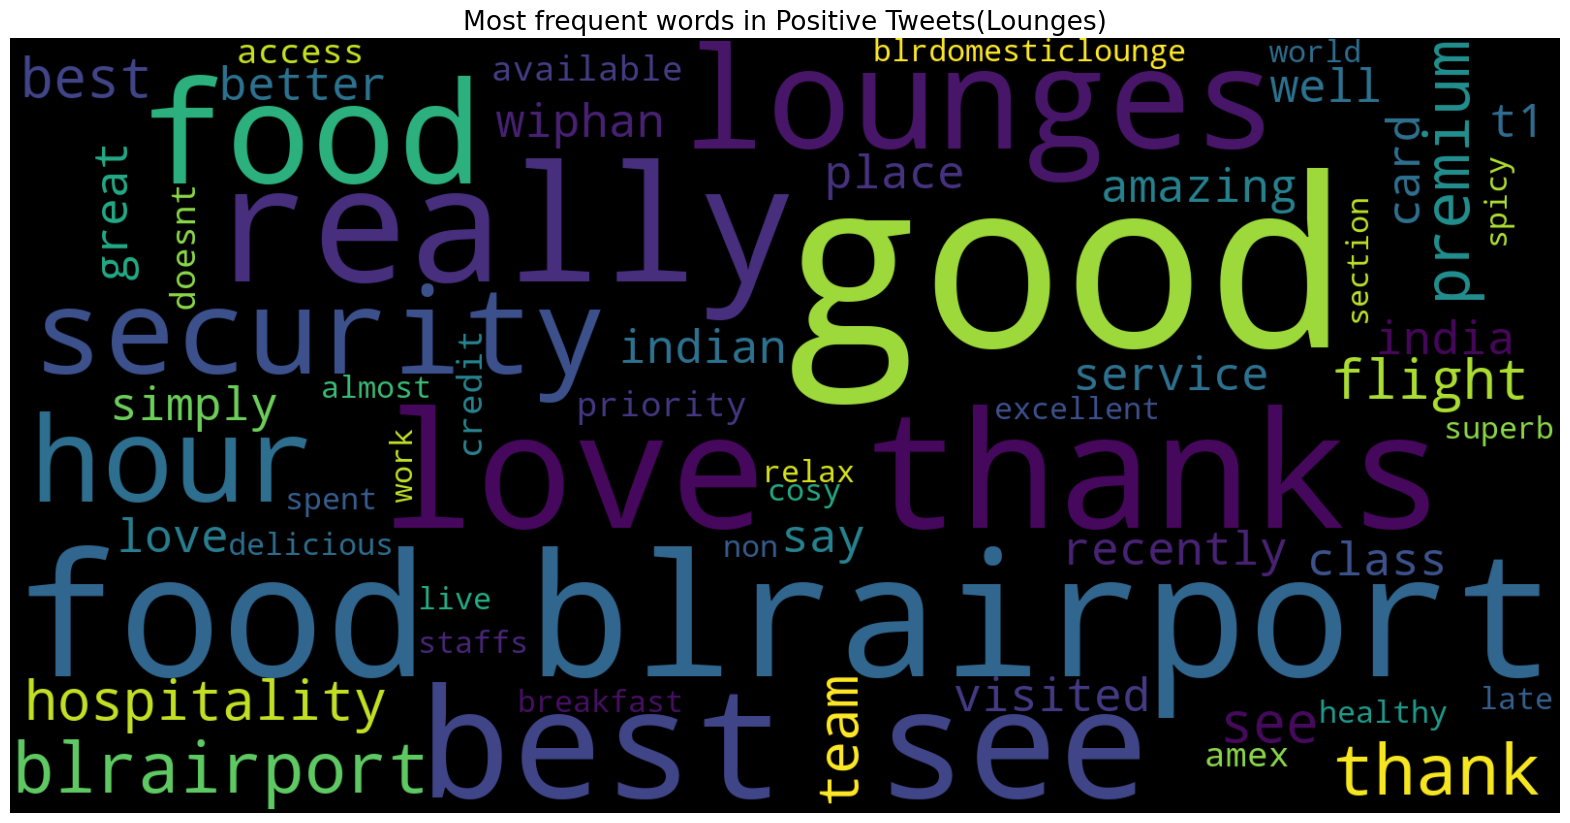

In [24]:
# WordCloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud= WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets(Lounges)', fontsize=19)
plt.show()

# Observation for positive tweets:
## 1) Efficient Processes and Convenience:
#### •	The implementation of the DigiYatra system is appreciated, making the process smoother and faster for passengers at Bangalore airport.
## 2) Lounge Facilities, Comfort and Services:
#### •	Praise for the general lounge facilities and services at Bangalore airport, highlighting good food and courteous staff members.
#### •	Comfort and cleanliness in the lounges are praised.
#### •	The availability of various amenities and comfortable seating areas at the lounge is highlighted.
